In [26]:
import json
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import matplotlib.colors as mcolors


In [30]:
def interaction_matrix(path):
    '''Retourne la matrice d'interaction ou Aij
    correpond au nombre de fois que le neud i transitionne
    vers j avec le dictionnaire label : id'''
    with open(path) as f:
        data = json.load(f)
    label_id=dict()
    transitions= dict()
    for melodie in data:
        for i in range(len(melodie)-1):
            splitted_x =melodie[i].split('-')
            splitted_y =melodie[i+1].split('-')
            #si la note contient un tiret ou pas
            x = splitted_x[0] if len(splitted_x)==2 else "-".join(substring for substring in splitted_x[:-1])
            y= splitted_y[0] if len(splitted_y)==2 else "-".join(substring for substring in splitted_y[:-1]) 
            if x not in label_id:
                label_id[x]= len(label_id)
            if y not in label_id:
                label_id[y]= len(label_id)
            key_transition= x+" "+y
            if key_transition not in transitions:
                transitions[key_transition]=0
            transitions[key_transition]+=1
    A= np.zeros((len(label_id),len(label_id)))
    for t in transitions:
        x,y=t.split(' ')
        A[label_id[x],label_id[y]]= transitions[t]
    return A,label_id
    
    
A,labels=interaction_matrix('Data/datasetA.json')


DiGraph with 80 nodes and 958 edges


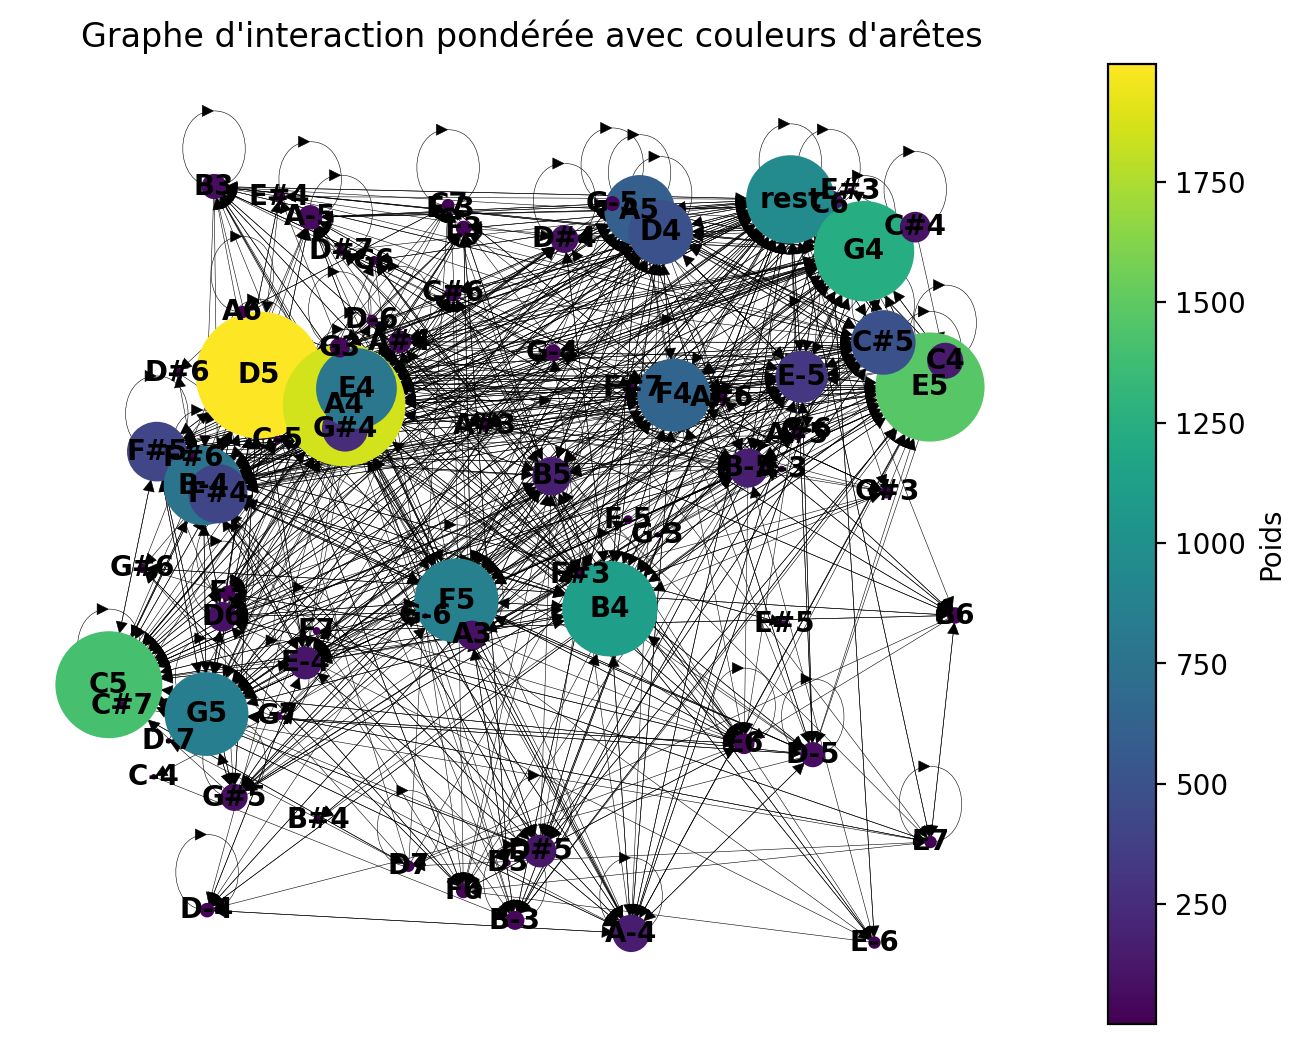

In [70]:
# Créer un graphe vide
G = nx.DiGraph()

# Ajouter des nœuds au graphe
G.add_nodes_from(labels)
num_nodes=len(labels)

# Ajouter des arêtes pondérées au graphe en fonction de la matrice d'interaction avec poids
for i in labels:
    for j in labels:
        weight = A[labels[i],labels[j]]
        if weight > 0:
            G.add_edge(i, j, weight=weight)

print(G)         
cmap = plt.cm.get_cmap('viridis')             
nodes_weight= [np.sum(A[:,i]) for i in range(num_nodes)]


# Associer les couleurs les degres entrant des noeuds
norm = mcolors.Normalize(vmin=min(nodes_weight), vmax=max(nodes_weight))
nodes_colors = [cmap(norm(w)) for w in nodes_weight]



pos = nx.random_layout(G)
# Dessiner le graphe avec des arêtes pondérées
nx.draw(G,pos, with_labels=True, node_color=nodes_colors, node_size=nodes_weight, font_size=10, font_weight='bold',width=0.2)


#a tester de separe les affichages
'''
nx.draw_networkx_nodes(G, pos, nodelist=nodes_with_poids_particulier, node_color='skyblue', node_size=1000, font_size=10, font_weight='bold')
nx.draw_networkx_labels(G, pos, labels={node: node for node in nodes_with_poids_particulier})
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=10, edge_color='gray', width=1.5)'''

# Ajouter une barre de couleur pour indiquer la correspondance poids-couleur
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Poids')

plt.title("Graphe d'interaction pondérée avec couleurs d'arêtes")
plt.show()